# Preliminary Modeling

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
# read in the cleaned flight delay data
flight_delay_df = pd.read_csv('../data/flight_delay_cleaned.csv')
flight_delay_df.head()

,date,delay_severity,avg_wind_speed_lga,precipitation_lga,snowfall_lga,snow_depth_lga,average_temp_lga,max_temp_lga,min_temp_lga,wind_direction_fastest_2min_lga,...,6am-9am _dep,6pm-9pm _dep,9am-12pm _dep,9pm-12am _dep,12pm-3pm _arr,3pm-6pm _arr,6am-9am _arr,6pm-9pm _arr,9am-12pm _arr,9pm-12am _arr
0,2015-01-01,0,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,1,0,0,0,0,0,1,0,0,0
1,2015-01-01,0,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,1,0,0,0,0,0,1,0,0,0
2,2015-01-01,2,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,1,0,0,0,0,0,0,0,1,0
3,2015-01-01,0,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,1,0,0,0,0,0,0,0,1,0
4,2015-01-01,0,13.87,0.0,0.0,0.0,31.0,39.0,27.0,240.0,...,0,0,1,0,0,0,0,0,1,0


In [3]:
# create X and y variables
X = flight_delay_df.drop(columns=['date', 'delay_severity'])
y = flight_delay_df['delay_severity']

In [4]:
# calculate the baseline score
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy = 'most_frequent', random_state = 96)
dummy_model.fit(X, y)
dummy_model.score(X, y)

0.6563895849221048

In [5]:
# split the data with train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    stratify=y,
                                                    random_state=96)

In [6]:
# scale the data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

Fit multiple models to select which models to further fine tune.

In [7]:
# utlilize a function to fit models with default hyperparameters and print train and test scores
def class_pipe(model):
    model = model()
    model.fit(Z_train, y_train)
    preds = model.predict(Z_test)
    cm = confusion_matrix(y_test, preds)
    ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(cmap='Blues');
    train_score = model.score(Z_train, y_train)
    test_score = model.score(Z_test, y_test)
    recall = recall_score(y_test, preds, average='macro')
    print(f'{model} training score: {train_score}')
    print(f'{model} testing score: {test_score}')
    print(f'{model} recall score: {recall}')
    return

It this case, false negatives are worse than false positives. We want optimize for the true positives and decrease false negatives, so we will also use the recall (sensitivity) score in addition to the accuracy scores to evaluate each model. And since the classes are unbalanced, we will compute the recall scores with a macro-average to weigh the score of the smaller classes equally as the larger classes.

LogisticRegression() training score: 0.677652185755141
LogisticRegression() testing score: 0.6824618736383442
LogisticRegression() recall score: 0.42134410123919247


/Users/JULIA/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


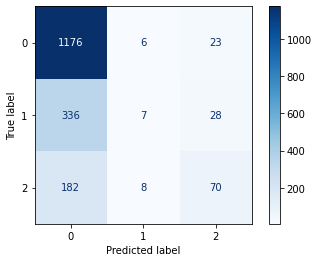

In [8]:
class_pipe(LogisticRegression)

DecisionTreeClassifier() training score: 0.9201961051341414
DecisionTreeClassifier() testing score: 0.6541394335511983
DecisionTreeClassifier() recall score: 0.5298940874882314


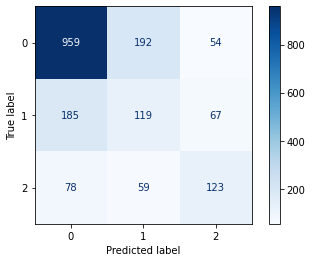

In [9]:
class_pipe(DecisionTreeClassifier)

RandomForestClassifier() training score: 0.9201961051341414
RandomForestClassifier() testing score: 0.6949891067538126
RandomForestClassifier() recall score: 0.5485371644457216


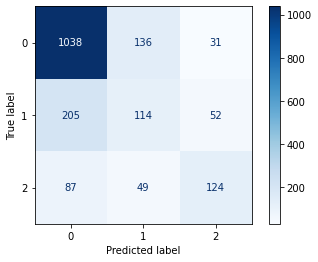

In [10]:
class_pipe(RandomForestClassifier)

GradientBoostingClassifier() training score: 0.7319896500068092
GradientBoostingClassifier() testing score: 0.7124183006535948
GradientBoostingClassifier() recall score: 0.48585322921031054


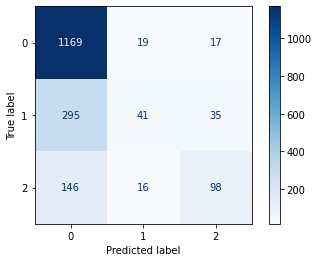

In [11]:
class_pipe(GradientBoostingClassifier)

AdaBoostClassifier() training score: 0.6918153343320169
AdaBoostClassifier() testing score: 0.6840958605664488
AdaBoostClassifier() recall score: 0.43652881865909343


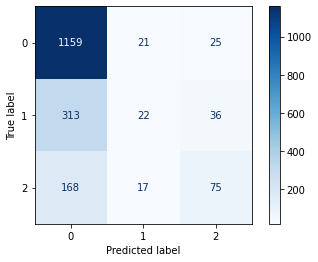

In [12]:
class_pipe(AdaBoostClassifier)

ExtraTreesClassifier() training score: 0.9201961051341414
ExtraTreesClassifier() testing score: 0.6955337690631809
ExtraTreesClassifier() recall score: 0.5489590995658482


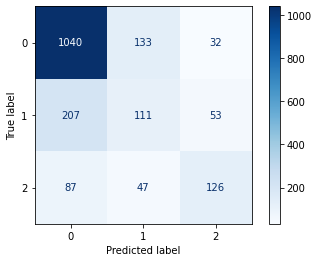

In [13]:
class_pipe(ExtraTreesClassifier)

[20:47:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/JULIA/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) training score: 0.8642244314312951
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_c

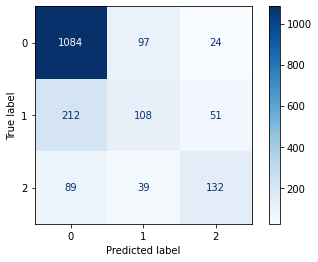

In [14]:
class_pipe(XGBClassifier)

KNeighborsClassifier() training score: 0.7552771346860956
KNeighborsClassifier() testing score: 0.6879084967320261
KNeighborsClassifier() recall score: 0.47151606711616106


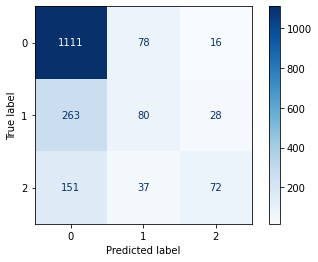

In [15]:
class_pipe(KNeighborsClassifier)

BernoulliNB() training score: 0.6310772163965681
BernoulliNB() testing score: 0.6410675381263616
BernoulliNB() recall score: 0.4606632752408999


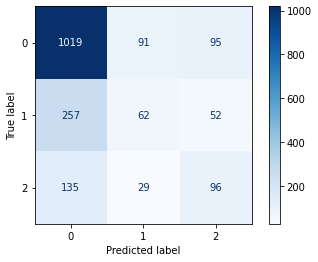

In [16]:
class_pipe(BernoulliNB)

SVC() training score: 0.7167370284624813
SVC() testing score: 0.6895424836601307
SVC() recall score: 0.4315422814091881


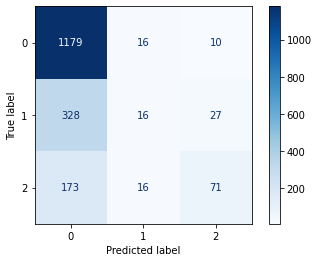

In [17]:
class_pipe(SVC)

The XGB Classifier had the highest recall score as 56.6% and was able classifying the minor and major delay labels correctly the most compared to the rest of the models. The train and test scores had a difference in accuracy by 14.3%, which shows the model is overfit but we may be able lower the train score by increasing bias and decreasing variance.

The Gradient Boosting Classifier had the highest training and testing scores above the baseline score(65.6%) that were neither overfit or underfit. The recall scores for this model was only 48.6%, but we may be able to try to increase the performance by tuning the hyperparamters.